In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [7]:
Vectorial_capacity = xr.open_dataset('Ghana_vc_chirps_era5_Tm_1991-2023.nc')
eip = xr.open_dataset('Ghana_EIP_era5_Tm_1991-2023.nc')
age = xr.open_dataset('Ghana_age_era5_Tm_1991-2023.nc')


In [12]:
Vectorial_capacity = xr.open_dataset('Ghana_vc_chirps_era5_Tm_1991-2023.nc')
vc = Vectorial_capacity['vc']
vc

<xarray.DataArray 'vc' (time: 396, latitude: 30, longitude: 20)>
[237600 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1991-01-16 ... 2023-12-16
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
Attributes:
    cell_methods:  time: sum

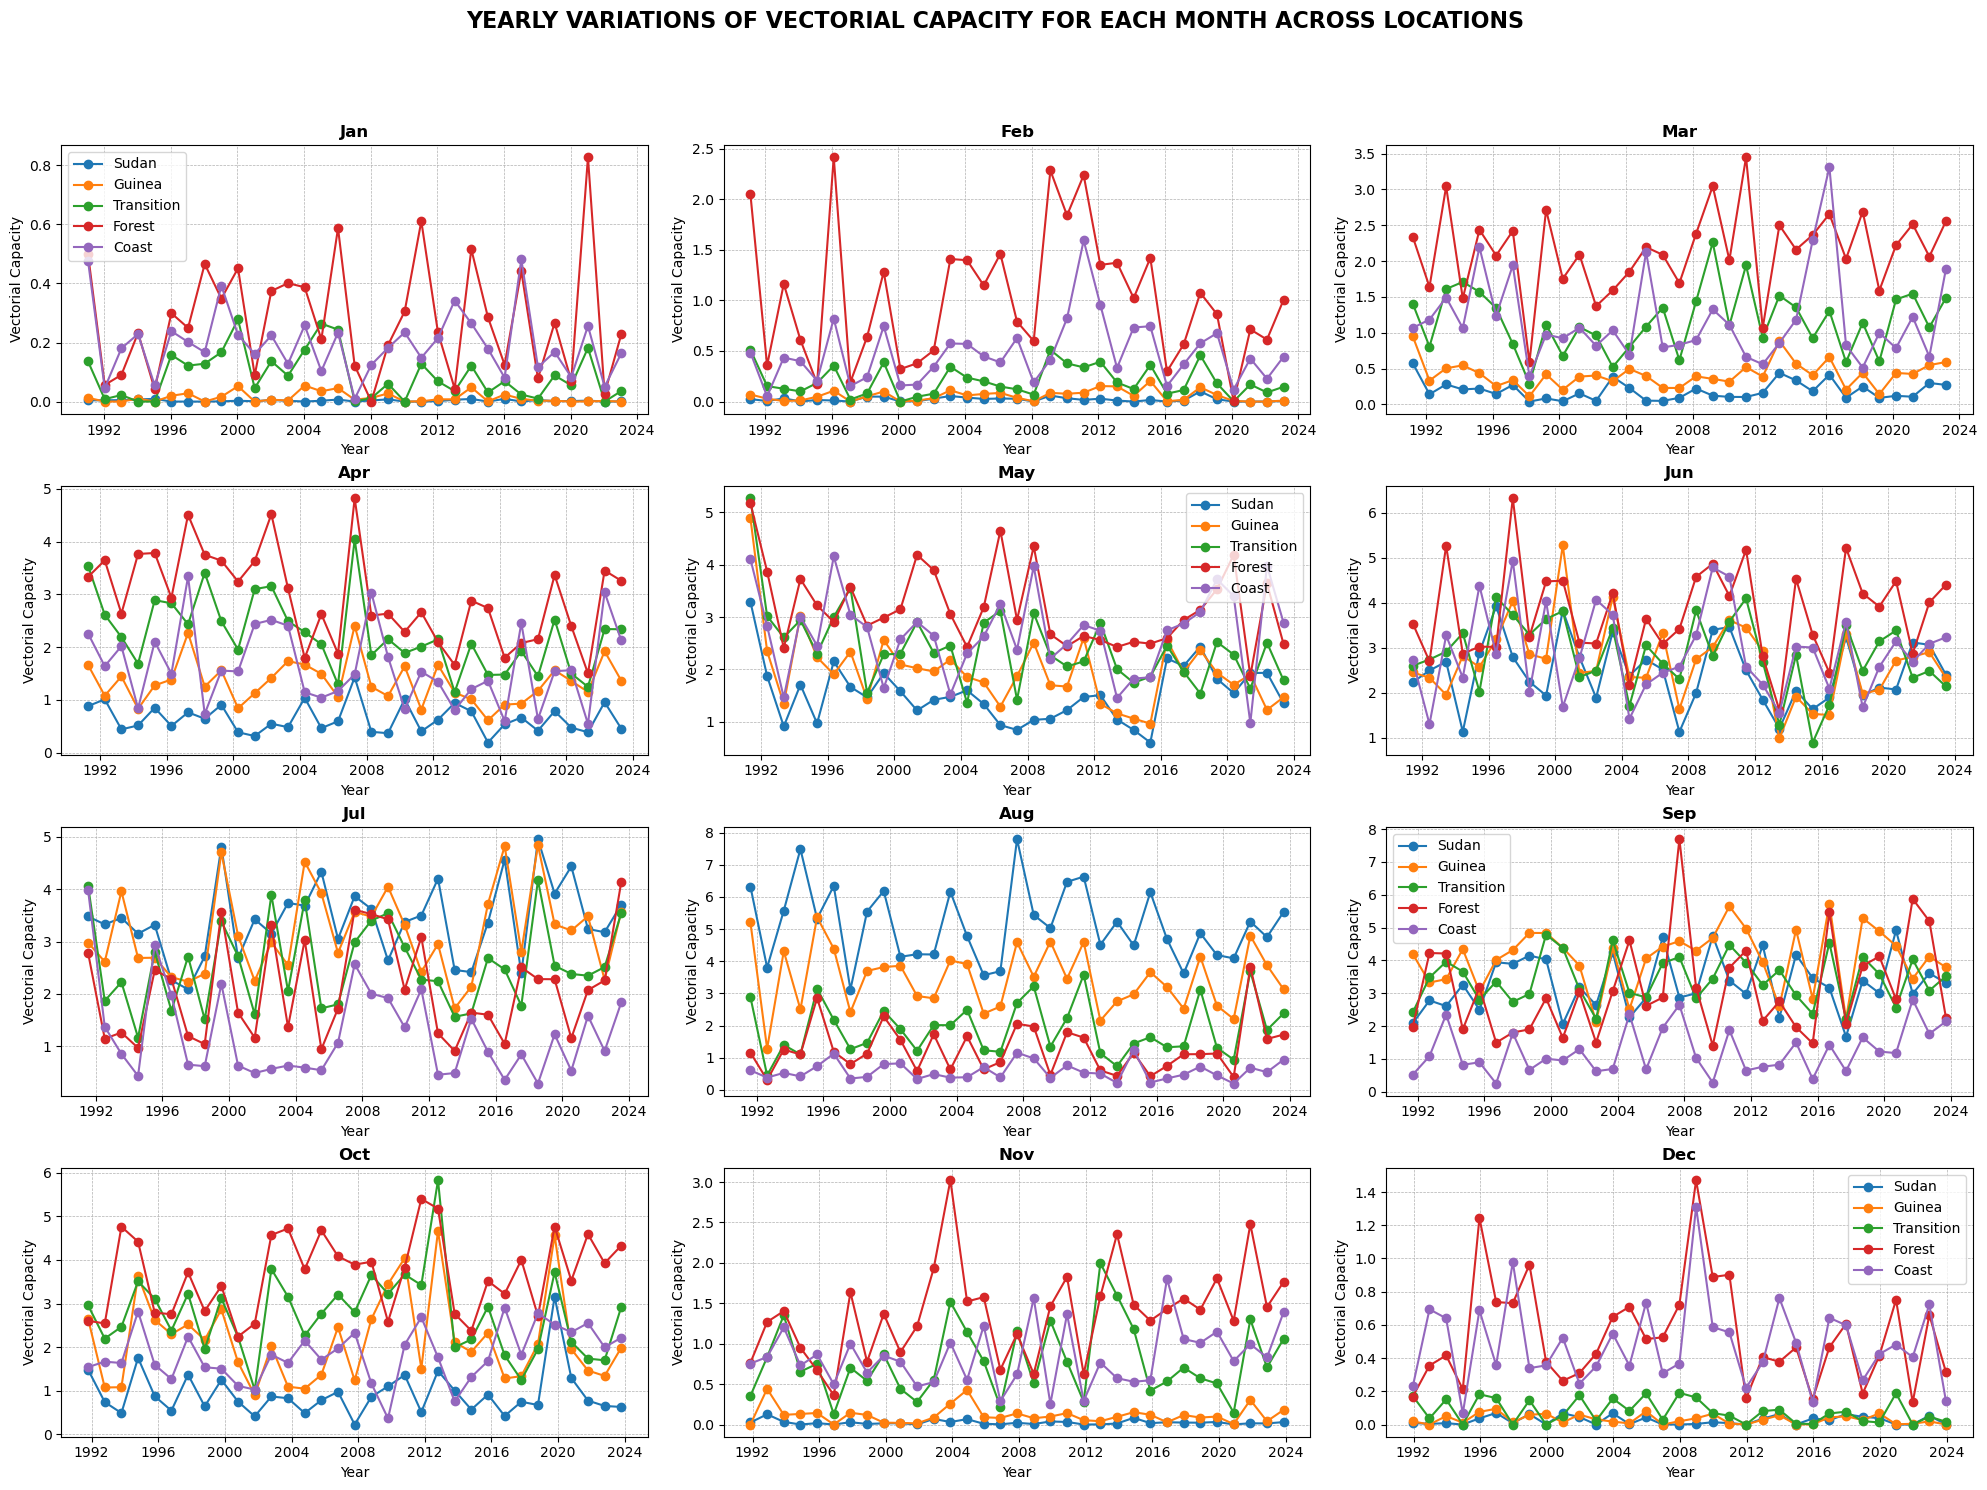

In [23]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
Vectorial_capacity = xr.open_dataset('Ghana_vc_chirps_era5_Tm_1991-2023.nc')
vc = Vectorial_capacity['vc']  # Extract the 'vc' variable

# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location using the nearest grid point
location_data = {
    loc: vc.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Get month names for subplot titles
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Initialize the 3x4 subplot grid
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()

# Loop through each month (1 to 12)
for month in range(1, 13):
    ax = axes[month - 1]  # Select the subplot for the current month

    for loc, data in location_data.items():
        # Select data for the given month across all years
        monthly_data = data.where(data['time'].dt.month == month, drop=True)

        # Plot vectorial capacity against time
        ax.plot(monthly_data['time'], monthly_data, label=loc, marker='o', linestyle='-')

    # Customize subplot
    ax.set_title(f"{month_names[month - 1]}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Vectorial Capacity", fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5)

# Add a legend to the last subplot
axes[0].legend(loc='upper left')
axes[4].legend(loc='upper right')
axes[8].legend(loc='upper left')
axes[11].legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.suptitle("YEARLY VARIATIONS OF VECTORIAL CAPACITY FOR EACH MONTH ACROSS LOCATIONS", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.9)

# Save and show the plot
#plt.savefig('vectorial_capacity_variation.png', bbox_inches='tight', dpi=800)
plt.show()


In [19]:
EIP = xr.open_dataset('Ghana_EIP_era5_Tm_1991-2023.nc')
eip = EIP['eip']

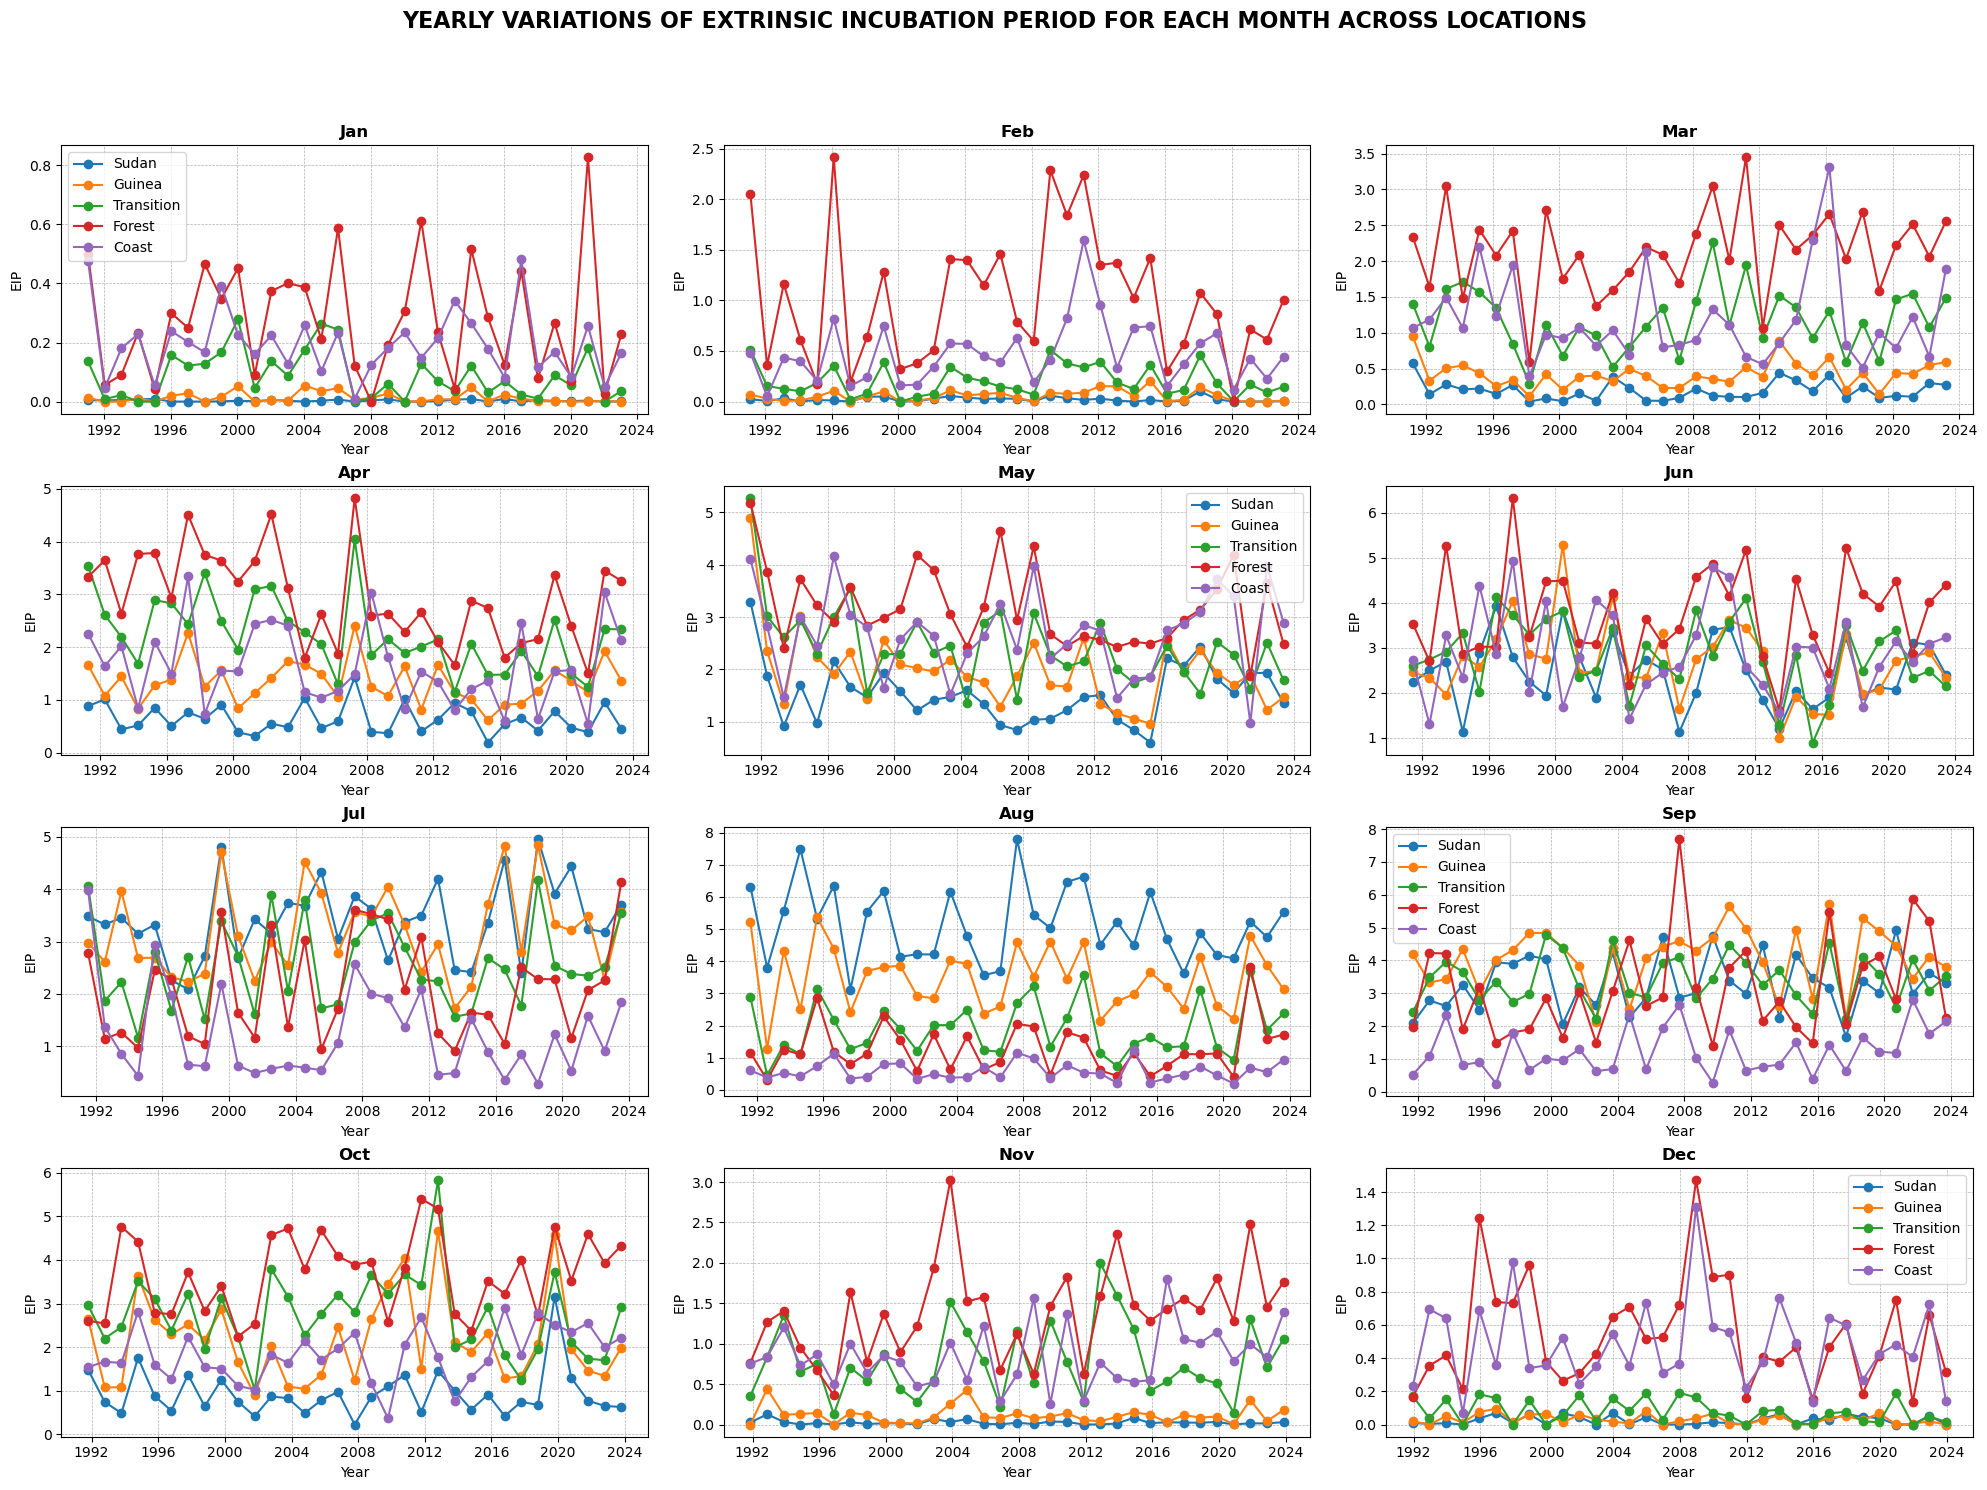

In [24]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
EIP = xr.open_dataset('Ghana_EIP_era5_Tm_1991-2023.nc')
eip = EIP['eip']
# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location using the nearest grid point
location_data = {
    loc: vc.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Get month names for subplot titles
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Initialize the 3x4 subplot grid
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()

# Loop through each month (1 to 12)
for month in range(1, 13):
    ax = axes[month - 1]  # Select the subplot for the current month

    for loc, data in location_data.items():
        # Select data for the given month across all years
        monthly_data = data.where(data['time'].dt.month == month, drop=True)

        # Plot vectorial capacity against time
        ax.plot(monthly_data['time'], monthly_data, label=loc, marker='o', linestyle='-')

    # Customize subplot
    ax.set_title(f"{month_names[month - 1]}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("EIP", fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5)

# Add a legend to the last subplot
axes[0].legend(loc='upper left')
axes[4].legend(loc='upper right')
axes[8].legend(loc='upper left')
axes[11].legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.suptitle("YEARLY VARIATIONS OF EXTRINSIC INCUBATION PERIOD FOR EACH MONTH ACROSS LOCATIONS", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.9)

# Save and show the plot
#plt.savefig('vectorial_capacity_variation.png', bbox_inches='tight', dpi=800)
plt.show()


In [25]:
AGE = xr.open_dataset('Ghana_age_era5_Tm_1991-2023.nc')
age = AGE['age']

<xarray.Dataset>
Dimensions:          (valid_time: 396, bnds: 2, longitude: 20, latitude: 30)
Coordinates:
  * valid_time       (valid_time) datetime64[ns] 1991-01-16T11:30:00 ... 2023...
  * longitude        (longitude) float32 -3.375 -3.125 -2.875 ... 1.125 1.375
  * latitude         (latitude) float32 4.625 4.875 5.125 ... 11.38 11.62 11.88
Dimensions without coordinates: bnds
Data variables:
    valid_time_bnds  (valid_time, bnds) datetime64[ns] ...
    age              (valid_time, latitude, longitude) float32 ...
Attributes:
    CDI:                     Climate Data Interface version 2.0.4 (https://mp...
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    history:                 Tue Mar 04 18:49:46 2025: cdo monmean age.nc /ho...
    frequency:               mon
    CDO:                     Climate Data Operators version 2.0.4 (https://mp...

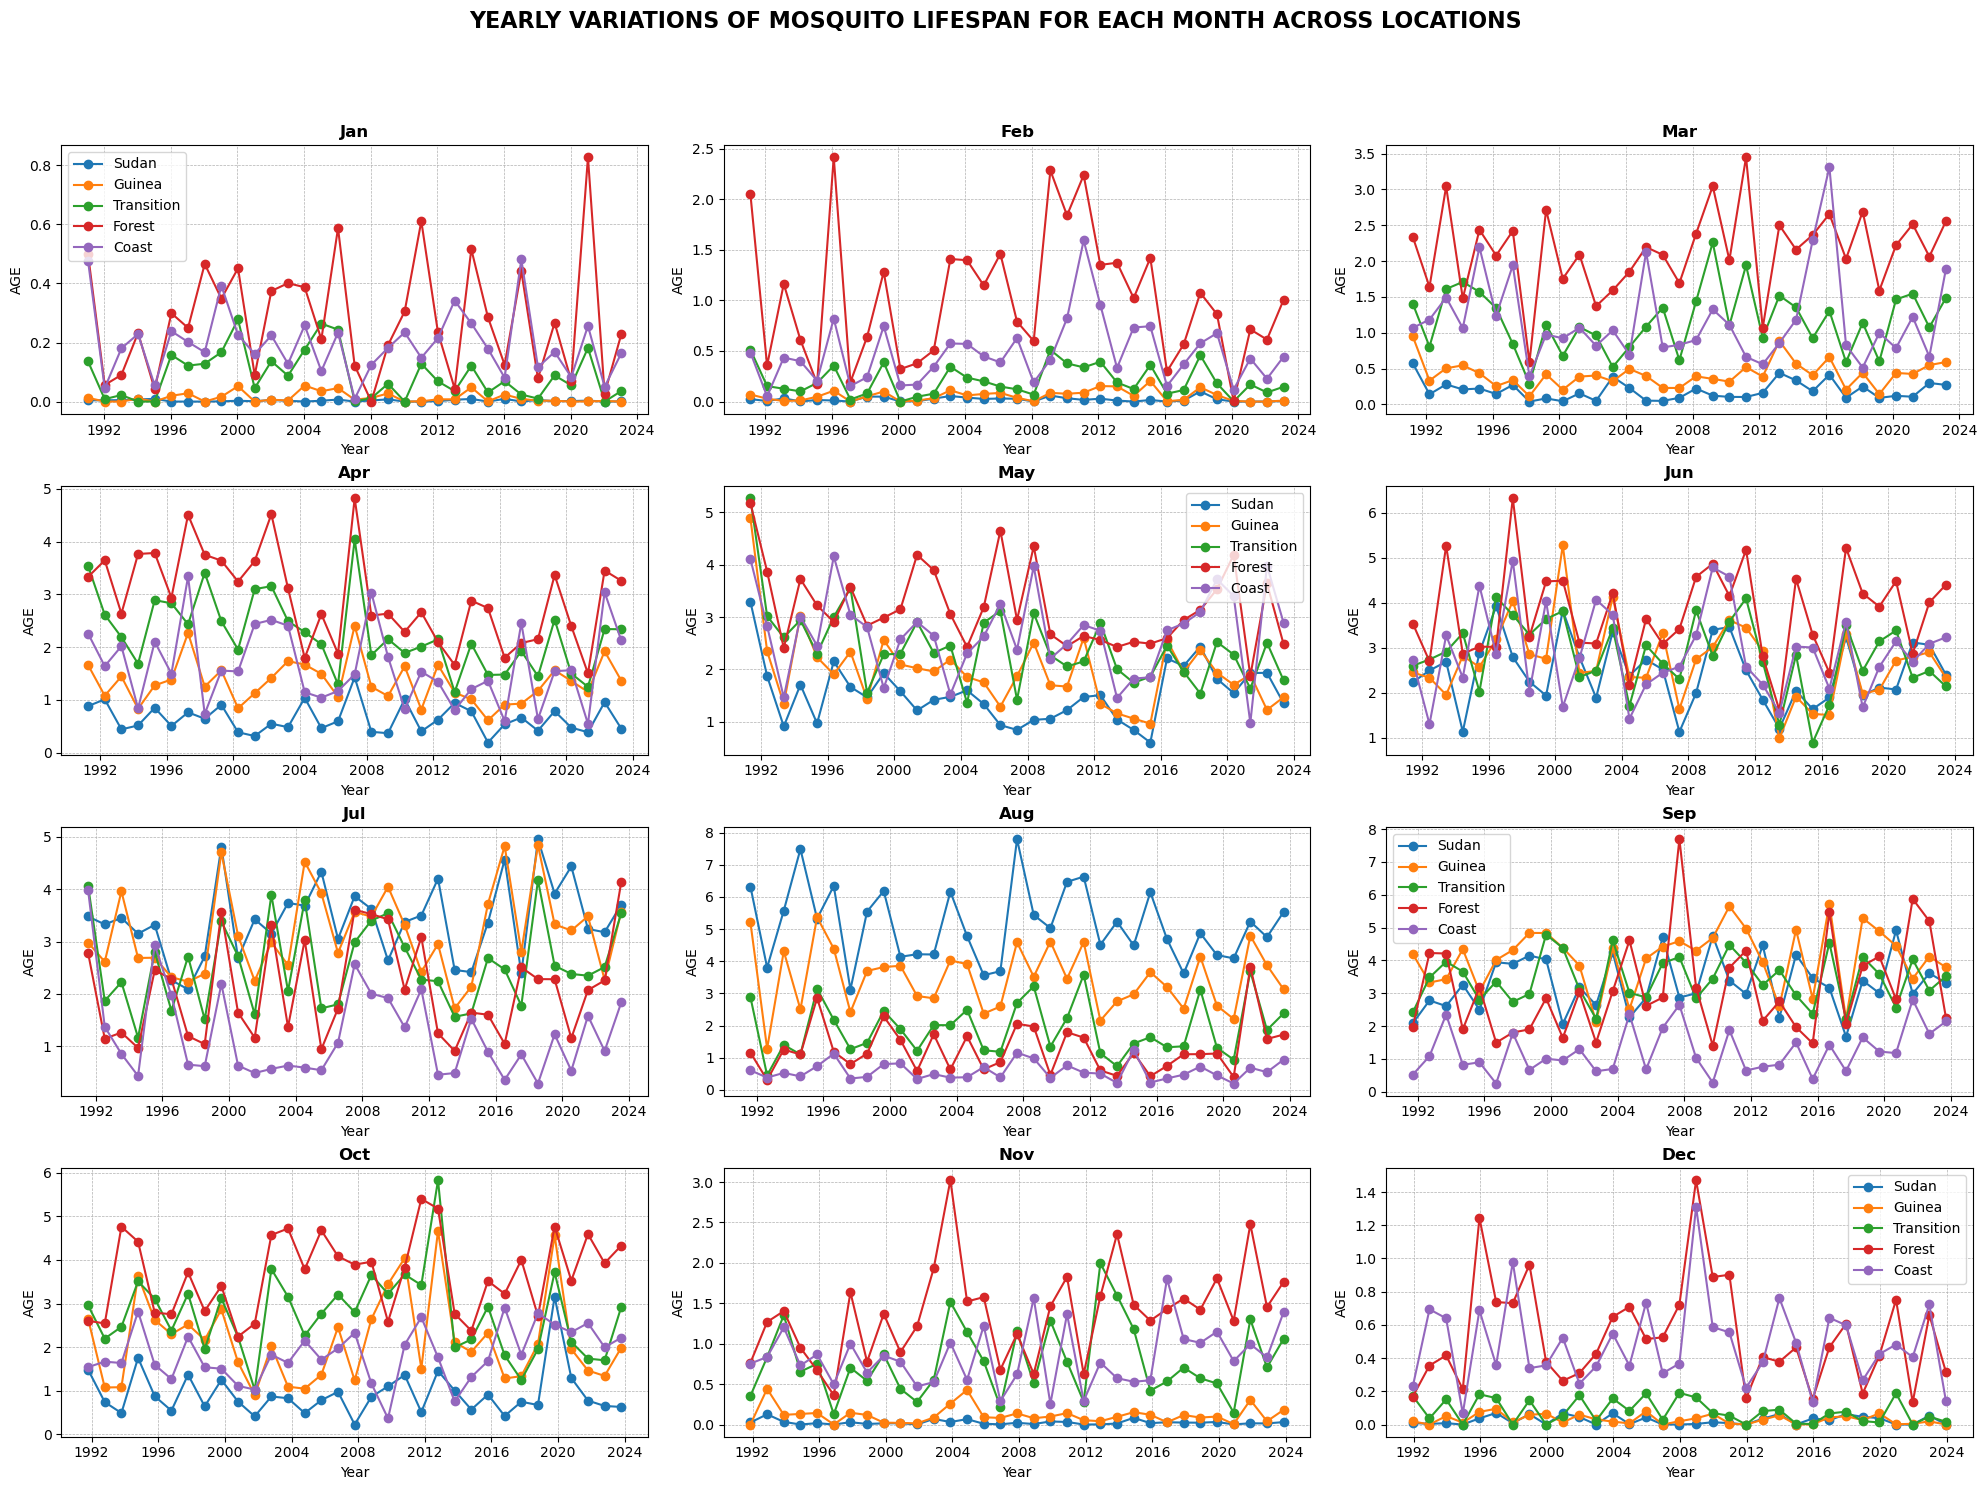

In [27]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
AGE = xr.open_dataset('Ghana_age_era5_Tm_1991-2023.nc')
age = AGE['age']
# Define locations with (longitude, latitude)
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Extract data for each location using the nearest grid point
location_data = {
    loc: vc.sel(longitude=lon, latitude=lat, method="nearest") for loc, (lon, lat) in locations.items()
}

# Get month names for subplot titles
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Initialize the 3x4 subplot grid
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()

# Loop through each month (1 to 12)
for month in range(1, 13):
    ax = axes[month - 1]  # Select the subplot for the current month

    for loc, data in location_data.items():
        # Select data for the given month across all years
        monthly_data = data.where(data['time'].dt.month == month, drop=True)

        # Plot vectorial capacity against time
        ax.plot(monthly_data['time'], monthly_data, label=loc, marker='o', linestyle='-')

    # Customize subplot
    ax.set_title(f"{month_names[month - 1]}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("AGE", fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5)

# Add a legend to the last subplot
axes[0].legend(loc='upper left')
axes[4].legend(loc='upper right')
axes[8].legend(loc='upper left')
axes[11].legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.suptitle("YEARLY VARIATIONS OF MOSQUITO LIFESPAN FOR EACH MONTH ACROSS LOCATIONS", 
             fontsize=16, fontweight='bold', y=0.99)
plt.subplots_adjust(top=0.9)

# Save and show the plot
#plt.savefig('vectorial_capacity_variation.png', bbox_inches='tight', dpi=800)
plt.show()


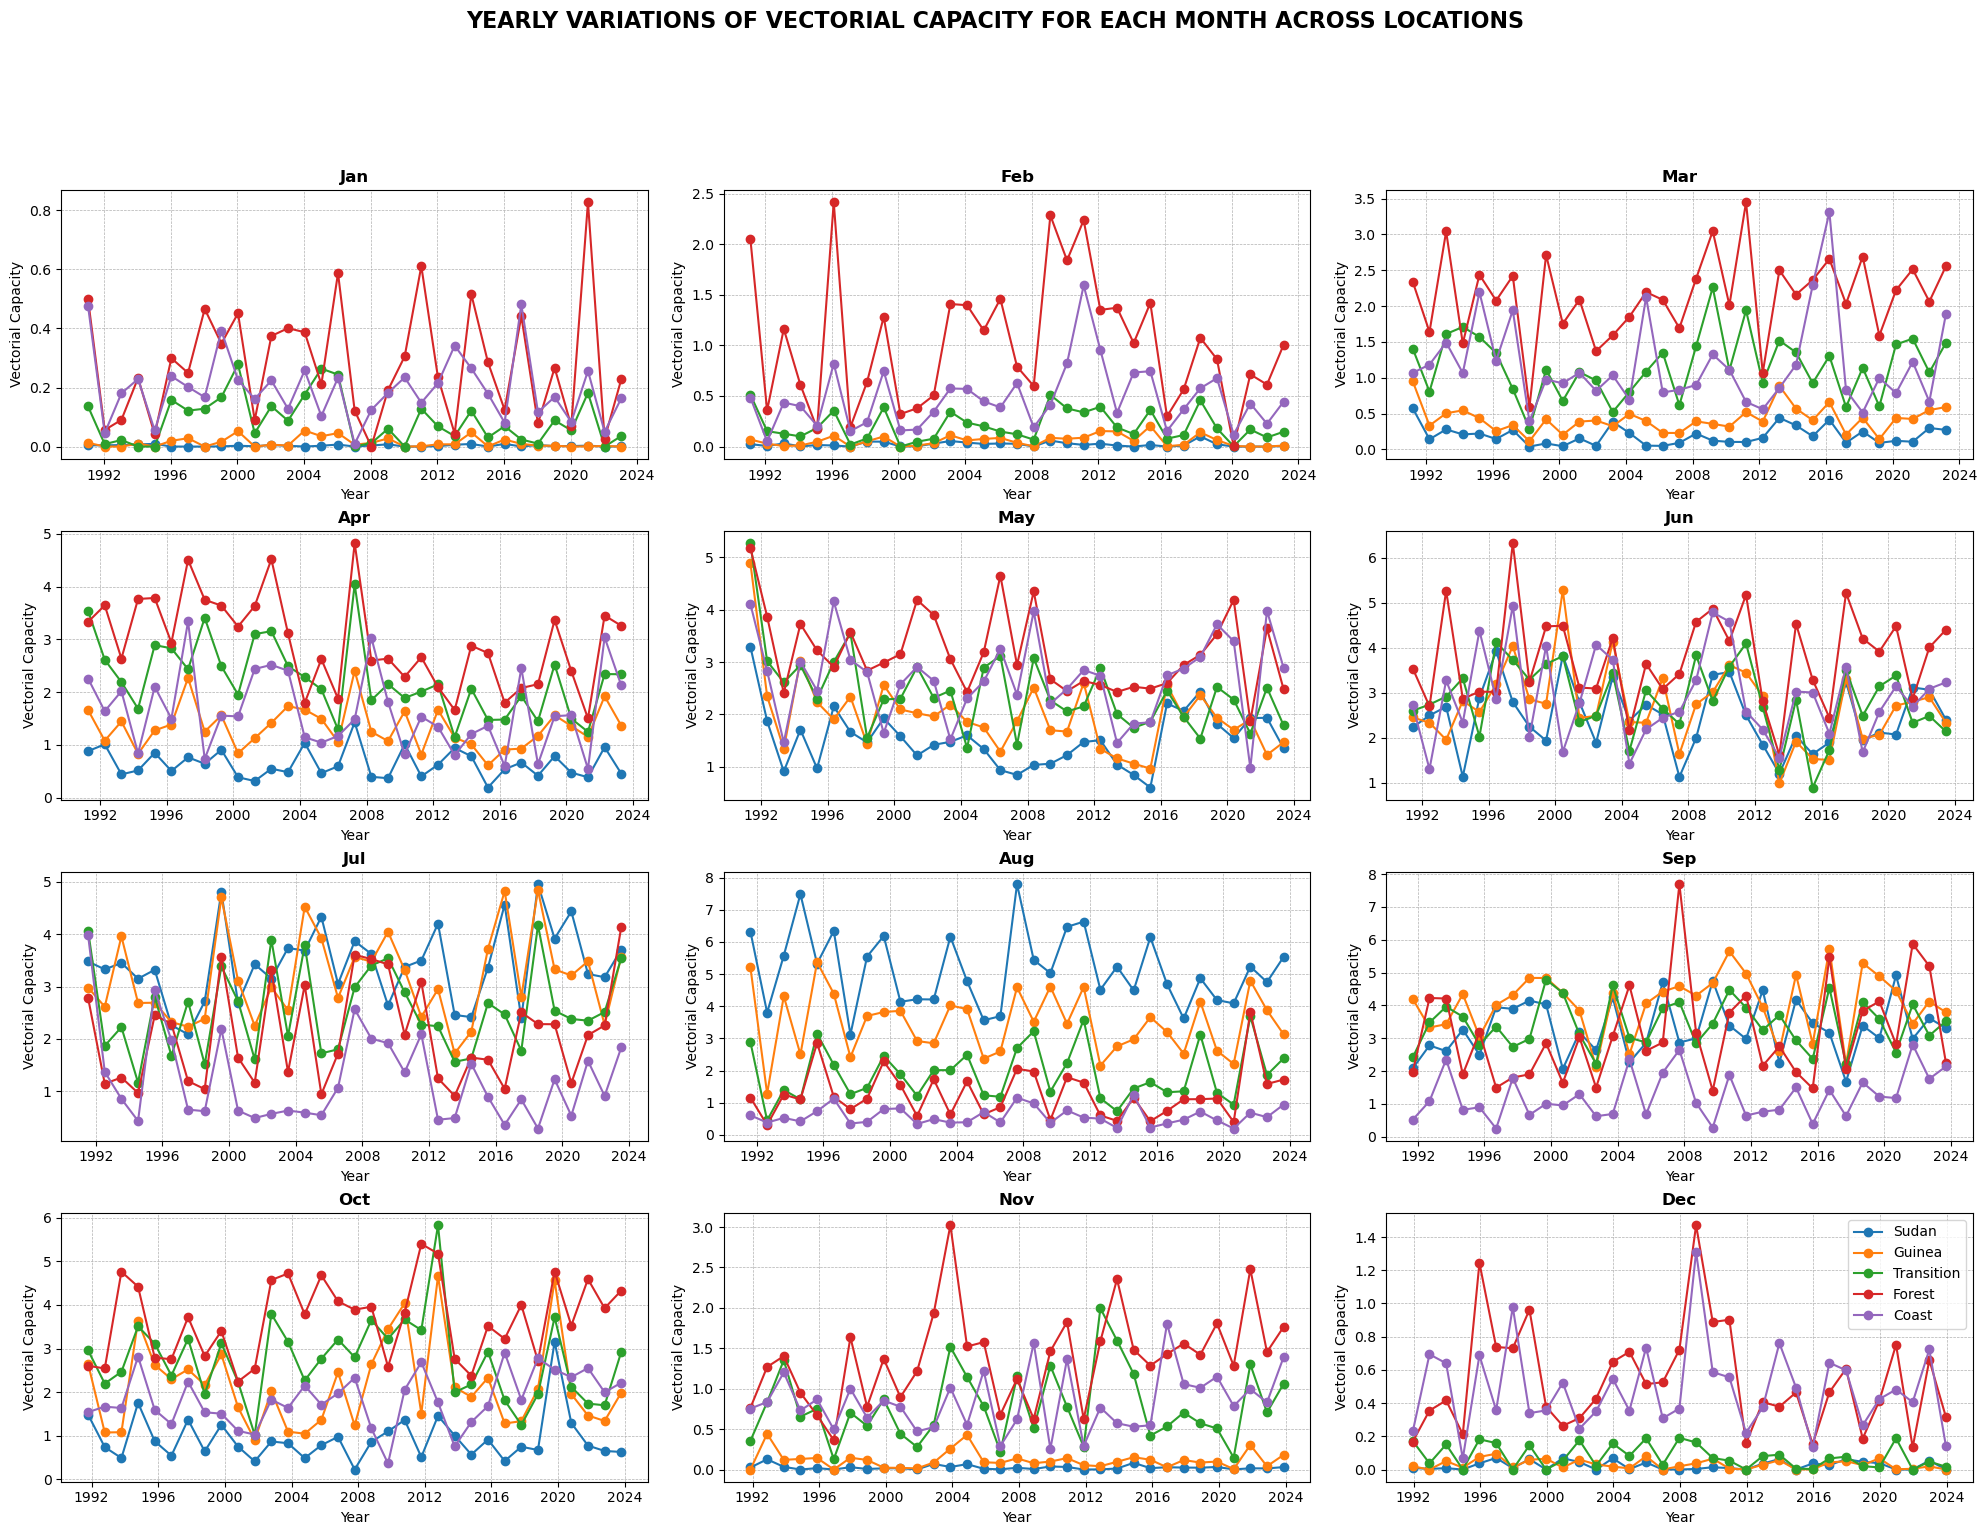

In [14]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the xarray dataset
ds = vc

# Define the locations
locations = {
    "Sudan": (-1.10, 10.90),
    "Guinea": (-0.85, 9.43),
    "Transition": (-1.72, 8.05),
    "Forest": (-1.62, 6.68),
    "Coast": (-0.17, 5.65)
}

# Initialize a dictionary to store extracted data
location_data = {}

# Extract data for each location using nearest neighbor interpolation
for loc, (lon, lat) in locations.items():
    location_data[loc] = ds.sel(longitude=lon, latitude=lat, method="nearest")

# Month names for subplot titles
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Initialize the 3x4 subplot grid
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()

# Loop through each month (1 to 12)
for month in range(1, 13):
    ax = axes[month - 1]  # Select subplot for the current month

    for loc, data in location_data.items():
        # Select data for the given month
        monthly_data = data.where(data['time'].dt.month == month, drop=True)

        # Plot vectorial capacity against time
        ax.plot(monthly_data['time'], monthly_data, label=loc, marker='o', linestyle='-')

    # Customize each subplot
    ax.set_title(f"{month_names[month - 1]}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Vectorial Capacity", fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5)

# Add a legend to the last subplot
axes[11].legend(loc='upper right')

# Adjust layout for better appearance
plt.tight_layout()
plt.suptitle("YEARLY VARIATIONS OF VECTORIAL CAPACITY FOR EACH MONTH ACROSS LOCATIONS", 
             fontsize=16, fontweight='bold', y=1.02)
plt.subplots_adjust(top=0.9)

# Save the plot
#plt.savefig('vectorial_capacity_variation.png', bbox_inches='tight', dpi=800)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
Navrongo = pd.read_csv('Navrongo_1991_2023_mmTn.txt', delim_whitespace=True, header=None, names=["year", "month", "Tmin"]).loc[0:359]
Kintampo = pd.read_csv('Kintampo_1991_2023_mmTn.txt', delim_whitespace=True, header=None, names=["year", "month", "Tmin"]).loc[0:359]
Dodowa_Forest = pd.read_csv('Dodowa_Forest_1991_2023_mmTn.txt', delim_whitespace=True, header=None, names=["year", "month", "Tmin"]).loc[0:359]
Dodowa_Coastal = pd.read_csv('Dodowa_Coastal_1991_2023_mmTn.txt', delim_whitespace=True, header=None, names=["year", "month", "Tmin"]).loc[0:359]

# Combine all datasets into a dictionary for easier access
datasets = {
    "Navrongo": Navrongo,
    "Kintampo": Kintampo,
    "Dodowa_Forest": Dodowa_Forest,
    "Dodowa_Coastal": Dodowa_Coastal
}

# Month names for the subplot titles
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Initialize the 3x4 subplot grid
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 3x4 grid for easier indexing

# Loop through each month (1 to 12)
for month in range(1, 13):
    ax = axes[month - 1]  # Select the subplot for the current month

    # Loop through each location dataset
    for location, data in datasets.items():
        # Filter data for the current month
        monthly_data = data[data['month'] == month]

        # Plot the Tmin values against the year for the current location
        ax.plot(monthly_data['year'], monthly_data['Tmin'], label=location, marker='o', linestyle='-')

    # Customize each subplot
    ax.set_title(f"{month_names[month - 1]}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Year", fontsize=10)
    ax.set_ylabel("Tmin (°C)", fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5)

# Add a legend to the last subplot
axes[11].legend(loc='upper right')# bbox_to_anchor=(1.3, 0.5))

# Adjust layout for better appearance
plt.tight_layout()
plt.suptitle("YEARLY VARIATIONS OF TMIN FOR EACH MONTH ACROSS LOCATIONS", fontsize=16, fontweight='bold', y=1.0)
plt.subplots_adjust(top=0.9)

# Save the plot
plt.savefig('yearly_variation.png', bbox_inches='tight', dpi=800)

# Show the plot
plt.show()
